# MNIST Classification using CNN
https://keras.io/examples/vision/image_classification_from_scratch/

# Headers

In [58]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers

# Load Data

In [59]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#check image shape
print(x_train[0].shape)

(28, 28)


In [60]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

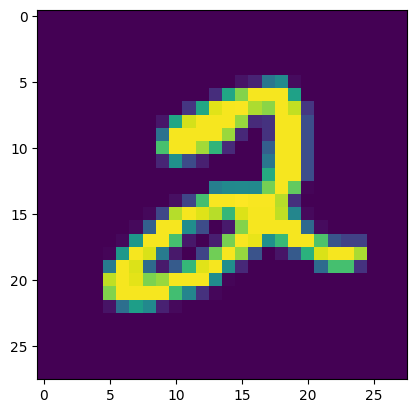

In [6]:
#plot the first image in the dataset
plt.imshow(x_train[5])

In [7]:
print(x_train[1].shape)
print(x_train.shape)
print(x_train.shape[0])

(28, 28)
(60000, 28, 28)
60000


In [61]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
#print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#print(y_train[0])

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


# Visualizing the input data

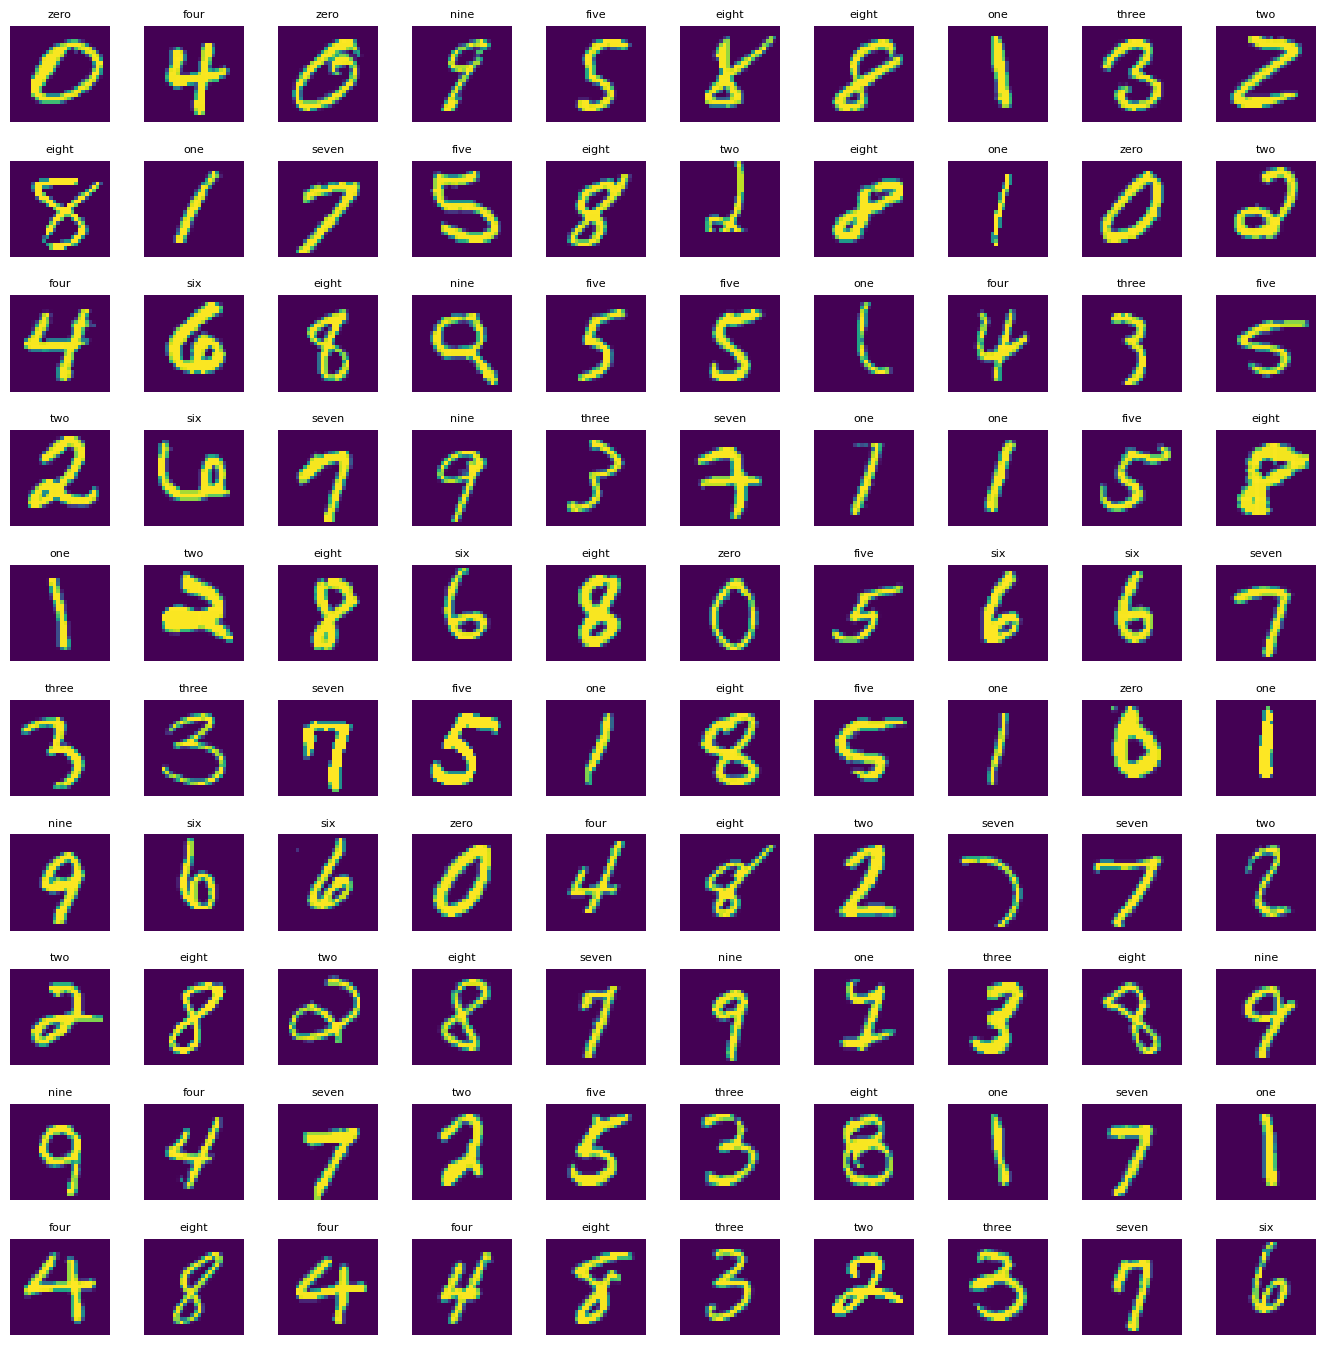

In [13]:
# Define the labels of the dataset
labels = ['one', 'two', 'three', 'four', 'five',
          'six', 'seven', 'eight', 'nine', 'zero']

# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 17 x 17 matrix in an array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(x_train[index,1:])
    #label_index = int(y_train[index])
    label_index = np.argmax(y_train[index])
    axes[i].set_title(labels[label_index-1], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Model Architecture

In [62]:
model_it8 = keras.Sequential()

"""
#Iteration 1:
model.add(Conv2D(filters=32, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

batch_size = 128
epochs = 15
"""

"""
#Iteration 2:
model_it2.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model_it2.add(MaxPooling2D(pool_size=(2,2)))
model_it2.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model_it2.add(MaxPooling2D(pool_size=(2,2)))

model_it2.add(Flatten())
model_it2.add(Dense(num_classes,activation="softmax"))

model_it2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_it2.summary()

batch_size = 64
epochs = 10
"""

"""
#Iteration 3:
model_it3.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model_it3.add(MaxPooling2D(pool_size=(2,2)))
model_it3.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
#model_it3.add(MaxPooling2D(pool_size=(2,2)))

model_it3.add(Flatten())
model_it3.add(Dense(num_classes,activation="softmax"))

model_it3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_it3.summary()

batch_size = 128
epochs = 5
"""

"""
#Iteration 4:
model_it4.add(Conv2D(filters=128, kernel_size = (3,3), activation="softmax", input_shape=(28,28,1)))
#model_it4.add(MaxPooling2D(pool_size=(2,2)))
model_it4.add(Conv2D(filters=128, kernel_size = (3,3), activation="softmax"))
#model_it4.add(MaxPooling2D(pool_size=(2,2)))

model_it4.add(Flatten())
model_it4.add(Dense(num_classes,activation="softmax"))

model_it4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_it4.summary()

batch_size = 128
epochs = 5
"""

"""
#Iteration 5:
model_it5.add(Conv2D(filters=32, kernel_size = (3,3), activation="softmax", input_shape=(28,28,1)))
model_it5.add(MaxPooling2D(pool_size=(2,2)))
model_it5.add(Conv2D(filters=64, kernel_size = (3,3), activation="softmax"))
model_it5.add(MaxPooling2D(pool_size=(2,2)))

model_it5.add(Flatten())
model_it5.add(Dense(num_classes,activation="softmax"))

model_it5.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_it5.summary()

batch_size = 128
epochs = 15
"""

"""
#Iteration 6:
model_it6.add(Conv2D(filters=32, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model_it6.add(MaxPooling2D(pool_size=(2,2)))
model_it6.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model_it6.add(MaxPooling2D(pool_size=(2,2)))

model_it6.add(Flatten())
model_it6.add(Dense(num_classes,activation="softmax"))

model_it6.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_it6.summary()

batch_size = 128
epochs = 5
"""

"""
#Iteration 7:
model_it7.add(Conv2D(filters=32, kernel_size = (8,8), activation="relu", input_shape=(28,28,1)))
model_it7.add(MaxPooling2D(pool_size=(2,2)))
model_it7.add(Conv2D(filters=64, kernel_size = (8,8), activation="relu"))
model_it7.add(MaxPooling2D(pool_size=(2,2)))

model_it7.add(Flatten())
model_it7.add(Dense(num_classes,activation="softmax"))

model_it7.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_it7.summary()

batch_size = 128
epochs = 5
"""


#Iteration 8:
model_it8.add(Conv2D(filters=32, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model_it8.add(AveragePooling2D(pool_size=(2,2)))
model_it8.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model_it8.add(AveragePooling2D(pool_size=(2,2)))

model_it8.add(Flatten())
model_it8.add(Dense(num_classes,activation="softmax"))

model_it8.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_it8.summary()

batch_size = 128
epochs = 5


print("batch_size: ", batch_size)
print("epochs    : ", epochs)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d (Average  (None, 13, 13, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 64)          0         
 gePooling2D)                                                    
                                                                 
 flatten_10 (Flatten)        (None, 1600)              0         
                                                                 
 dense_10 (Dense)            (None, 10)              

# Training the model

In [63]:
history = model_it8.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 37s 86ms/step - loss: 0.3926 - accuracy: 0.8916 - val_loss: 0.1184 - val_accuracy: 0.9688
Epoch 2/5
422/422 [==============================] - 35s 83ms/step - loss: 0.1121 - accuracy: 0.9666 - val_loss: 0.0793 - val_accuracy: 0.9788
Epoch 3/5
422/422 [==============================] - 37s 88ms/step - loss: 0.0810 - accuracy: 0.9757 - val_loss: 0.0683 - val_accuracy: 0.9803
Epoch 4/5
422/422 [==============================] - 34s 81ms/step - loss: 0.0665 - accuracy: 0.9801 - val_loss: 0.0592 - val_accuracy: 0.9837
Epoch 5/5
422/422 [==============================] - 36s 85ms/step - loss: 0.0576 - accuracy: 0.9829 - val_loss: 0.0522 - val_accuracy: 0.9863


# Evaluate the model

Test loss: 0.04726525768637657
Test accuracy: 0.9860000014305115
313/313 [==============================] - 4s 12ms/step
(10000,)
(10000,)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



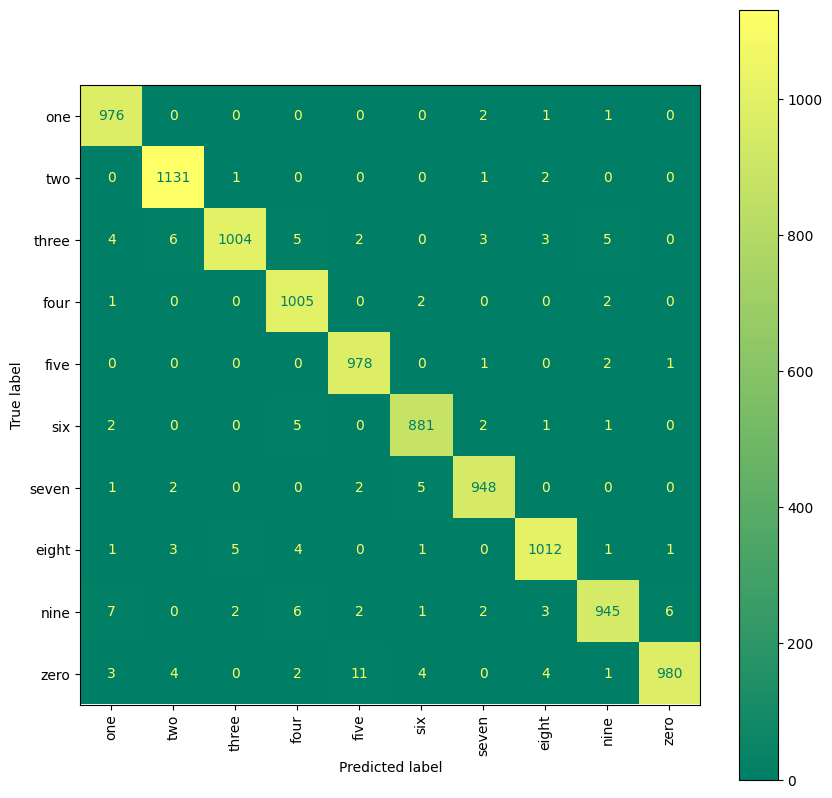

In [64]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Test loss and Test Accuracy
score = model_it8.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Precision, Recall and F1 Score
y_pred = model_it8.predict(x_test)

# Extracting highest probability predictions
y_test_max = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

print(y_test_max.shape)
print(y_pred.shape)

#print(classification_report(y_test_max, y_pred, zero_division=1.0))
print(classification_report(y_test_max, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_max, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

# Plot Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


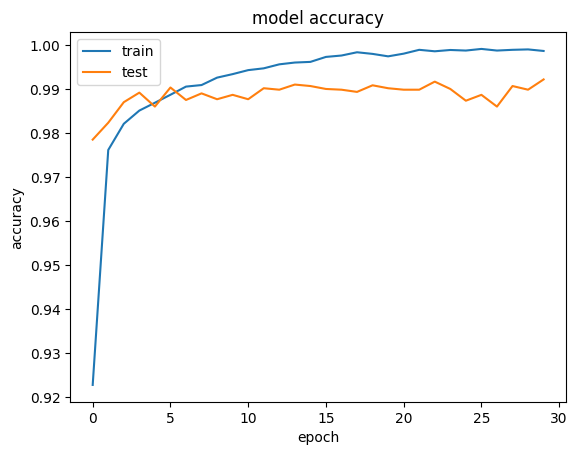

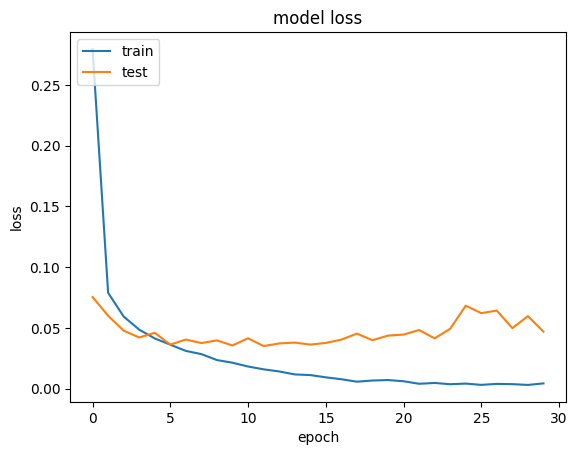

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Visualizing the test data and corresponding predictions

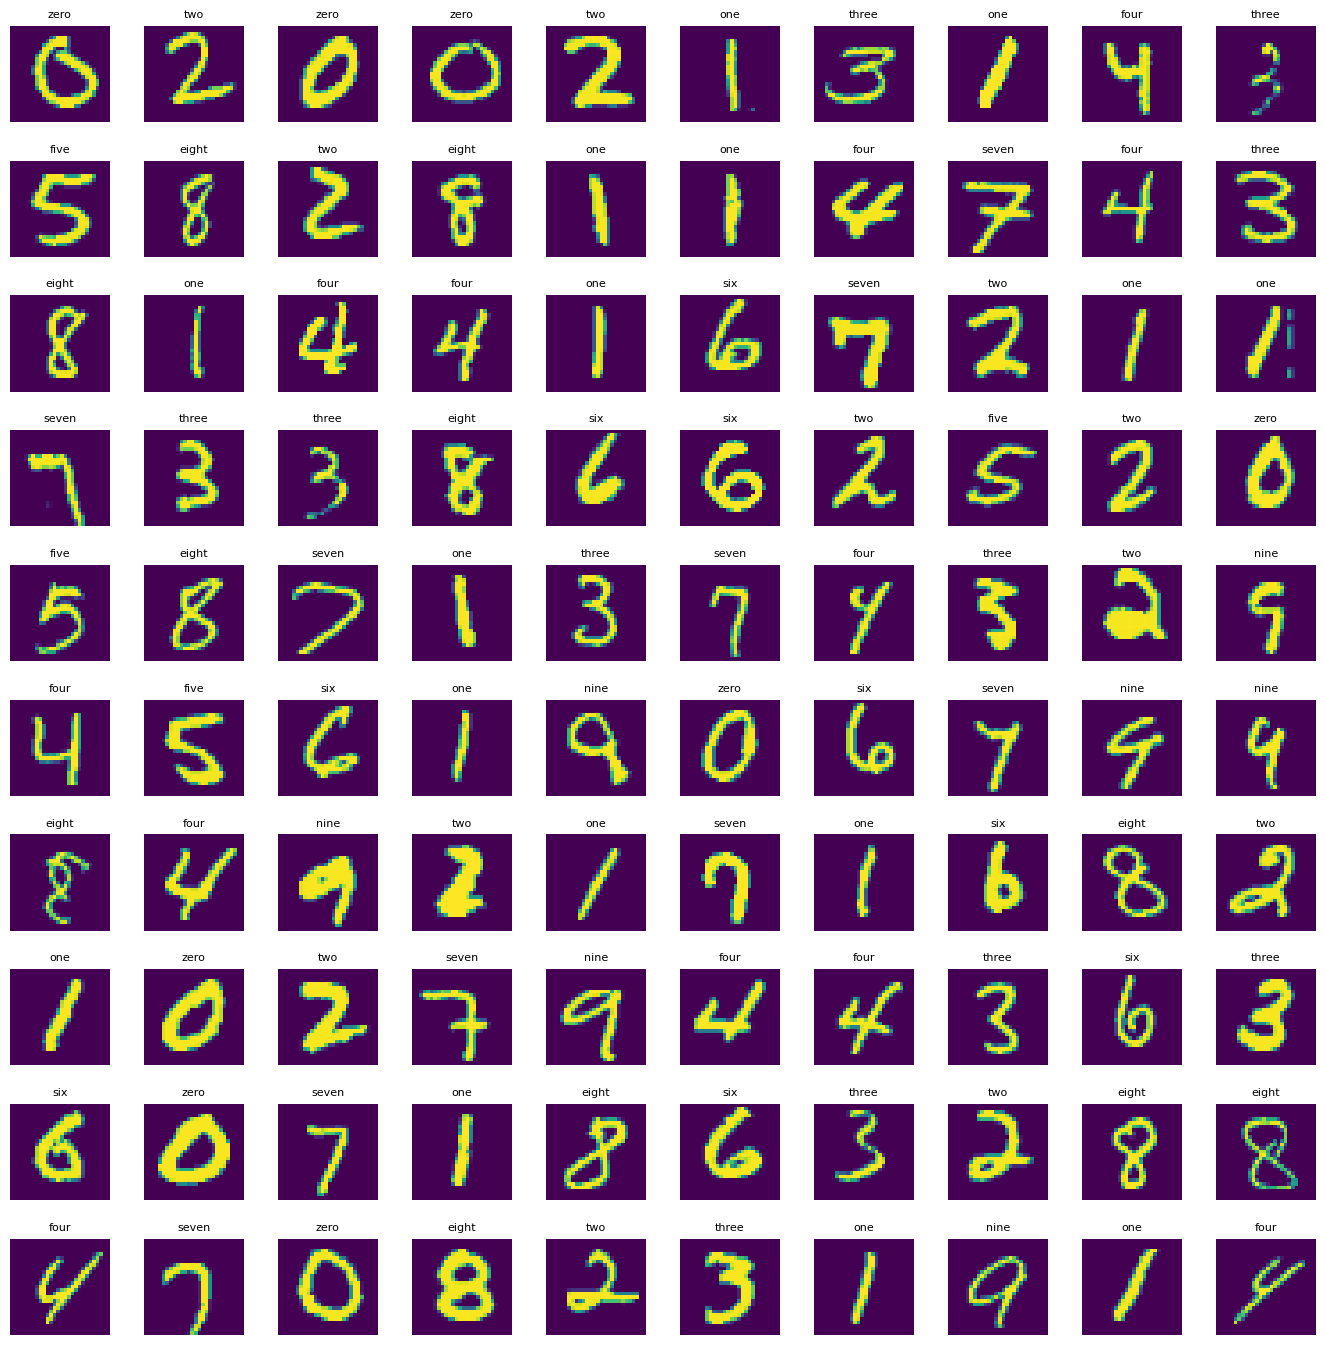

In [12]:
# Define the labels of the dataset
labels = ['one', 'two', 'three', 'four', 'five',
          'six', 'seven', 'eight', 'nine', 'zero']

# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 17 x 17 matrix in an array

n_test = len(x_test) # get the length of the train dataset

# Select a random number from 0 to n_test
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index
    axes[i].imshow(x_test[index,1:])
    #label_index = int(y_test[index])
    label_index = np.argmax(y_test[index])
    axes[i].set_title(labels[label_index-1], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)